<h1>아오지

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 훈련세트와 테스트를 나눠주는 모듈
from sklearn.model_selection import train_test_split
# 선형회귀를 이용할 모듈
from sklearn.linear_model import LinearRegression
# 주어진 특성들을 이용해 새로운 특성을 만들어주는 모듈
from sklearn.preprocessing import PolynomialFeatures
# 표준화를 하기 위한 모듈
from sklearn.preprocessing import StandardScaler

In [ ]:
from datetime import datetime, timedelta

<h2>지하철 이용자 수 데이터</h2>

In [ ]:
# 일일 지하철 이용자 수 데이터
metro_data = pd.read_csv("/content/drive/MyDrive/data/MLR/일간지하철승차량.csv")
metro_data = metro_data[metro_data['사용일자']>'2019-12-31']

In [ ]:
metro_data = metro_data.reset_index(drop=True)

In [ ]:
metro_data.rename(columns={"사용일자": "기준일"}, inplace=True)

In [ ]:
metro_data = metro_data.astype({'기준일': 'datetime64'})
metro_data['요일'] = metro_data['기준일'].dt.dayofweek

In [ ]:
metro_data

,기준일,일별이용자수
0,2020-01-01,3479698
1,2020-01-02,7691529
2,2020-01-03,8224917
3,2020-01-04,6042529
4,2020-01-05,4425521
...,...,...
665,2021-10-27,6788314
666,2021-10-28,6763319
667,2021-10-29,6975784
668,2021-10-30,5076792


<h2>확진자 수 데이터</h2>

In [ ]:
# 서울시 일일 신규 확진자수 데이터
confirmed_data = pd.read_csv("/content/drive/MyDrive/data/MLR/서울시_신규확진자.csv", encoding='euc-kr')
confirmed_data

,기준일,신규확진자
0,2020-01-20,0
1,2020-01-21,0
2,2020-01-22,0
3,2020-01-23,0
4,2020-01-24,0
...,...,...
666,2021-11-16,846
667,2021-11-17,1436
668,2021-11-18,1429
669,2021-11-19,1401


In [ ]:
confirmed_data.dtypes

기준일      object
신규확진자     int64
dtype: object

<h2>백신 접종 데이터</h2>

<h2>그래프로 확인</h2>

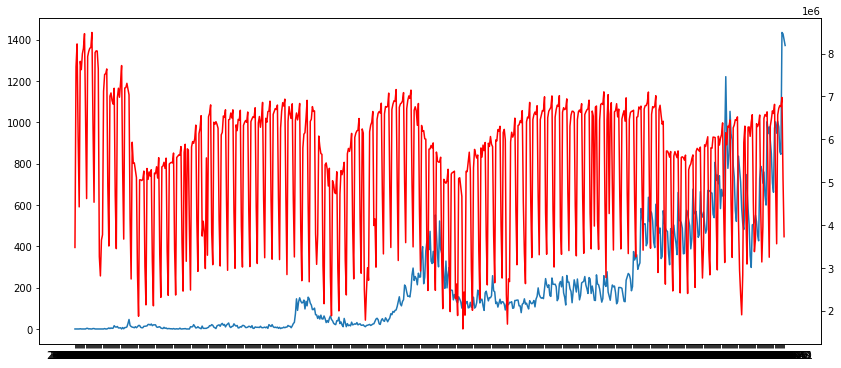

In [ ]:
fig = plt.figure(figsize=(14, 6))
ax = plt.subplot(1,1,1)

ax.plot(confirmed_data['기준일'], confirmed_data['신규확진자'])

ax2 = ax.twinx()
ax2.plot(metro_data['사용일자'], metro_data['일별이용자수'], color='r')

plt.show()

<h2>회귀분석</h2>

<h3>확진자 - 지하철 = 19일

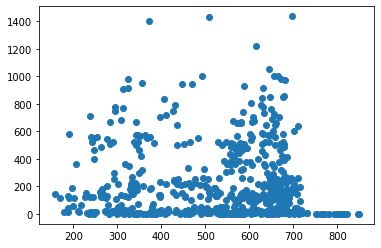

In [ ]:
# 지하철 : 2020-01-01 ~ 2021-10-31
# 신규확진자 : 2020-01-20 ~ 2021-11-19	
x = metro_data[['일별이용자수']] / 10000
y = confirmed_data[['신규확진자']].drop(670)

plt.plot(x, y, 'o')
plt.show()

위의 산포도 그래프를 보면 유의미한 회귀가 힘들것으로 예상된다.


<h3>확진자 - 지하철 = 19일

In [ ]:
confirmed_data_201101 = confirmed_data[confirmed_data['기준일']>'2020-10-31']
confirmed_data_201101 = confirmed_data_201101[confirmed_data_201101['기준일']<'2021-11-07']
confirmed_data_201101 = confirmed_data_201101.reset_index(drop=True)
confirmed_data_201101

,기준일,신규확진자
0,2020-11-01,45
1,2020-11-02,25
2,2020-11-03,22
3,2020-11-04,42
4,2020-11-05,50
...,...,...
366,2021-11-02,600
367,2021-11-03,1004
368,2021-11-04,946
369,2021-11-05,979


In [ ]:
metro_data_201026 = metro_data[metro_data['기준일']>'2020-10-25']
metro_data_201026 = metro_data_201026.reset_index(drop=True)
metro_data_201026

,기준일,일별이용자수,요일
0,2020-10-26,6696975,0
1,2020-10-27,6821817,1
2,2020-10-28,6898878,2
3,2020-10-29,6885557,3
4,2020-10-30,7161554,4
...,...,...,...
366,2021-10-27,6788314,2
367,2021-10-28,6763319,3
368,2021-10-29,6975784,4
369,2021-10-30,5076792,5


In [ ]:
test0 = pd.merge(metro_data_201026, confirmed_data_201101, left_index=True, right_index=True, how='left')
test1 = test0[test0['요일']<6]

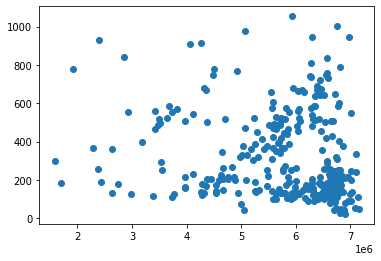

In [ ]:
# 지하철 : 2020-10-25 ~ 2021-10-31
# 신규확진자 : 2020-10-31 ~ 2021-11-07
# 주말은 제외
x = test1[['일별이용자수']]
y = test1[['신규확진자']]

plt.plot(x, y, 'o')
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

line_fitter = LinearRegression()
line_fitter.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(line_fitter.coef_, line_fitter.intercept_)

[[-4.37974733e-05]] [580.18076912]


In [ ]:
line_fitter.score(x_train, y_train)

0.04908138313292276

In [ ]:
line_fitter.score(x_test, y_test)

-0.13552769237251816

In [ ]:
train_poly = np.column_stack((x_train ** 2, x_train))
test_poly = np.column_stack((x_test ** 2, x_test))

In [ ]:
lr = LinearRegression()
lr.fit(train_poly, y_train)

LinearRegression()

In [ ]:
print(lr.coef_, lr.intercept_)

[[-1.83467100e-11  1.39579545e-04]] [157.59320032]


역시 엉망....<br>
일단 확진자수가 적으면 에러가 난다.

In [ ]:
# 2021년
test2 = test1[test1['기준일_x']>'2020-12-31']

In [ ]:
# 2020년
test3 = test1[test1['기준일_x']<'2021-01-01']

In [ ]:
# 일요일
test4 = test0[test0['요일']==6]

In [ ]:
test2

,기준일_x,일별이용자수,요일,기준일_y,신규확진자
67,2021-01-01,1578935,4,2021-01-07,298
68,2021-01-02,2438627,5,2021-01-08,191
70,2021-01-04,5254470,0,2021-01-10,187
71,2021-01-05,5247518,1,2021-01-11,141
72,2021-01-06,5472595,2,2021-01-12,167
...,...,...,...,...,...
365,2021-10-26,6724725,1,2021-11-01,646
366,2021-10-27,6788314,2,2021-11-02,600
367,2021-10-28,6763319,3,2021-11-03,1004
368,2021-10-29,6975784,4,2021-11-04,946


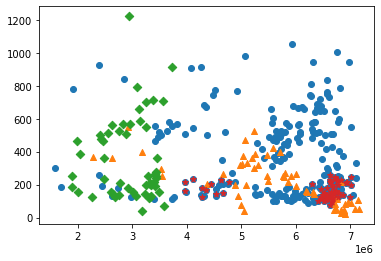

In [ ]:
# 지하철 : 2021-01-01 ~ 2021-10-30
# 신규확진자 : 2021-01-07 ~ 2021-11-05
# 주말은 제외
x = test2[['일별이용자수']]
y = test2[['신규확진자']]

x2 = test3[['일별이용자수']]
y2 = test3[['신규확진자']]

x3 = test4[['일별이용자수']]
y3 = test4[['신규확진자']]

plt.scatter(x, y)
plt.scatter(x2, y2, marker='^')
plt.scatter(x3, y3, marker='D')
plt.show()

<h3>앞에서 여러가지를 시도해봤는데, 결국 모양은 다 비슷했음<br>
지하철 이용자수는 코로나 이후 큰 변화가 없지만 코로나 신규 감염자 수는 우상향하기 때문인것으로 보임.<br>
그렇다면 이용자수와 확진자수 모두 변화율을 통해 구해본다면 어떨까?

In [ ]:
metro_data

,기준일,일별이용자수
0,2020-01-01,3479698
1,2020-01-02,7691529
2,2020-01-03,8224917
3,2020-01-04,6042529
4,2020-01-05,4425521
...,...,...
665,2021-10-27,6788314
666,2021-10-28,6763319
667,2021-10-29,6975784
668,2021-10-30,5076792


In [ ]:
confirmed_data

,기준일,신규확진자
0,2020-01-20,0
1,2020-01-21,0
2,2020-01-22,0
3,2020-01-23,0
4,2020-01-24,0
...,...,...
666,2021-11-16,846
667,2021-11-17,1436
668,2021-11-18,1429
669,2021-11-19,1401


<h3> 1.확진일 - 지하철이용일 = 7

In [ ]:
metro_data_7_ago = metro_data[metro_data['기준일']>'2020-01-12'].reset_index(drop=True)

In [ ]:
metro_data_7_ago

,기준일,일별이용자수
0,2020-01-13,7931538
1,2020-01-14,8051486
2,2020-01-15,8124059
3,2020-01-16,8141415
4,2020-01-17,8492225
...,...,...
653,2021-10-27,6788314
654,2021-10-28,6763319
655,2021-10-29,6975784
656,2021-10-30,5076792


In [ ]:
day_before_7 = pd.merge(metro_data_7_ago, confirmed_data, left_index=True, right_index=True, how='left')

In [ ]:
day_before_7["기준일_x"] = pd.to_datetime(day_before_7["기준일_x"])

In [ ]:
day_before_7 = day_before_7.drop(columns='기준일_y')

In [ ]:
day_before_7 = day_before_7.resample('W-Mon', on='기준일_x').sum().reset_index()
day_before_7["기준일_x"] = day_before_7['기준일_x'] - timedelta(days=7)
day_before_7

,기준일_x,일별이용자수,신규확진자
0,2020-01-06,7931538,0
1,2020-01-13,51766720,1
2,2020-01-20,37274813,7
3,2020-01-27,45239198,4
4,2020-02-03,43106598,2
...,...,...,...
90,2021-09-27,36905927,4630
91,2021-10-04,37010638,3941
92,2021-10-11,40517060,3353
93,2021-10-18,41611630,4826


In [ ]:
day_before_7.loc[day_before_7["기준일_x"]=="2020-01-20", ["일별이용자수"]] = 48502959
day_before_7.loc[day_before_7["기준일_x"]=="2020-09-28", ["일별이용자수"]] = 37663267
day_before_7.loc[day_before_7["기준일_x"]=="2021-02-08", ["일별이용자수"]] = 38074803

In [ ]:
day_before_7

,기준일_x,일별이용자수,신규확진자
0,2020-01-06,7931538,0
1,2020-01-13,51766720,1
2,2020-01-20,48502959,7
3,2020-01-27,45239198,4
4,2020-02-03,43106598,2
...,...,...,...
90,2021-09-27,36905927,4630
91,2021-10-04,37010638,3941
92,2021-10-11,40517060,3353
93,2021-10-18,41611630,4826


In [ ]:
day_before_7 = day_before_7[day_before_7['기준일_x']>'2020-10-01'].reset_index(drop=True)
day_before_7

,기준일_x,일별이용자수,신규확진자
0,2020-10-05,37003821,138
1,2020-10-12,41383851,125
2,2020-10-19,42438651,255
3,2020-10-26,42744134,291
4,2020-11-02,42964633,442
5,2020-11-09,43138913,812
6,2020-11-16,40212746,1187
7,2020-11-23,36190911,1638
8,2020-11-30,35092084,1967
9,2020-12-07,32330785,2635


In [ ]:
# 변화량을 확인하기 위해 컬럼 추출
metro_user = day_before_7['일별이용자수']
confirmed = day_before_7['신규확진자']

In [ ]:
metro_user = metro_user.drop(metro_user.index[[55]])
confirmed = confirmed.drop(confirmed.index[55])

In [ ]:
day_before_7 = day_before_7.drop(day_before_7.index[[0]]).reset_index(drop=True)

In [ ]:
day_before_7['일별이용자수'] = day_before_7['일별이용자수'] - metro_user

In [ ]:
day_before_7['신규확진자'] = day_before_7['신규확진자'] - confirmed

In [ ]:
day_before_7

,기준일_x,일별이용자수,신규확진자
0,2020-10-12,4380030,-13
1,2020-10-19,1054800,130
2,2020-10-26,305483,36
3,2020-11-02,220499,151
4,2020-11-09,174280,370
5,2020-11-16,-2926167,375
6,2020-11-23,-4021835,451
7,2020-11-30,-1098827,329
8,2020-12-07,-2761299,668
9,2020-12-14,-1904480,58


In [ ]:
day_before_7 = day_before_7[day_before_7['기준일_x']>'2020-11-01'].reset_index(drop=True)

In [ ]:
# 스케일러
scaler = StandardScaler()

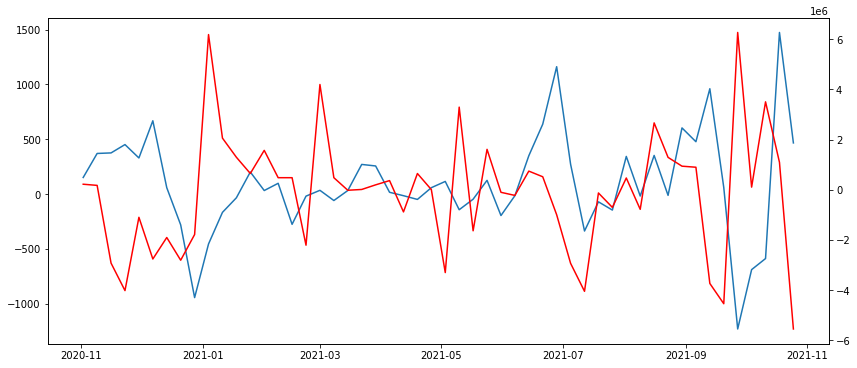

In [ ]:
fig = plt.figure(figsize=(14, 6))
ax = plt.subplot(1,1,1)

ax.plot(day_before_7['기준일_x'], day_before_7['신규확진자'])

ax2 = ax.twinx()
ax2.plot(day_before_7['기준일_x'], day_before_7['일별이용자수'], color='r')

plt.show()

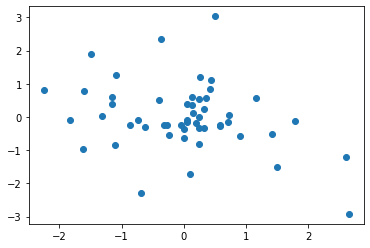

In [ ]:
x = day_before_7[['일별이용자수']]
y = day_before_7[['신규확진자']]

scaler.fit(x)
x = scaler.transform(x)

scaler.fit(y)
y = scaler.transform(y)


plt.scatter(x, y)
plt.show()

1주일차이는 망함

<h3> 2.확진일 - 지하철이용일 = 14

In [ ]:
metro_data_14_ago = metro_data[metro_data['기준일']>'2020-01-05'].reset_index(drop=True)

In [ ]:
metro_data_14_ago

,기준일,일별이용자수
0,2020-01-06,7819416
1,2020-01-07,7624873
2,2020-01-08,7995810
3,2020-01-09,8123002
4,2020-01-10,8464744
...,...,...
660,2021-10-27,6788314
661,2021-10-28,6763319
662,2021-10-29,6975784
663,2021-10-30,5076792


In [ ]:
day_before_14 = pd.merge(metro_data_14_ago, confirmed_data, left_index=True, right_index=True, how='left')

In [ ]:
day_before_14["기준일_x"] = pd.to_datetime(day_before_14["기준일_x"])

In [ ]:
day_before_14 = day_before_14.drop(columns='기준일_y')

In [ ]:
day_before_14 = day_before_14.resample('W-Mon', on='기준일_x').sum().reset_index()
day_before_14["기준일_x"] = day_before_14['기준일_x'] - timedelta(days=7)
day_before_14

,기준일_x,일별이용자수,신규확진자
0,2019-12-30,7819416,0
1,2020-01-06,51210906,1
2,2020-01-13,51766720,7
3,2020-01-20,37274813,4
4,2020-01-27,45239198,2
...,...,...,...
91,2021-09-27,36905927,3941
92,2021-10-04,37010638,3353
93,2021-10-11,40517060,4826
94,2021-10-18,41611630,5999


In [ ]:
day_before_14.loc[day_before_14["기준일_x"]=="2020-01-20", ["일별이용자수"]] = 48502959
day_before_14.loc[day_before_14["기준일_x"]=="2020-09-28", ["일별이용자수"]] = 37663267
day_before_14.loc[day_before_14["기준일_x"]=="2021-02-08", ["일별이용자수"]] = 38074803

In [ ]:
day_before_14

,기준일_x,일별이용자수,신규확진자
0,2019-12-30,7819416,0
1,2020-01-06,51210906,1
2,2020-01-13,51766720,7
3,2020-01-20,48502959,4
4,2020-01-27,45239198,2
...,...,...,...
91,2021-09-27,36905927,3941
92,2021-10-04,37010638,3353
93,2021-10-11,40517060,4826
94,2021-10-18,41611630,5999


In [ ]:
# 변화량을 확인하기 위해 컬럼 추출
metro_user = day_before_14['일별이용자수']
confirmed = day_before_14['신규확진자']

In [ ]:
metro_user = metro_user.drop(metro_user.index[[94]])
confirmed = confirmed.drop(confirmed.index[[94]])

In [ ]:
day_before_14 = day_before_14.drop(day_before_14.index[[0]]).reset_index(drop=True)

In [ ]:
day_before_14['일별이용자수'] = day_before_14['일별이용자수'] - metro_user

In [ ]:
day_before_14['신규확진자'] = day_before_14['신규확진자'] - confirmed

In [ ]:
day_before_14

,기준일_x,일별이용자수,신규확진자
0,2020-01-06,43391490.0,1.0
1,2020-01-13,555814.0,6.0
2,2020-01-20,-3263761.0,-3.0
3,2020-01-27,-3263761.0,-2.0
4,2020-02-03,-2132600.0,15.0
...,...,...,...
90,2021-09-27,6273033.0,-689.0
91,2021-10-04,104711.0,-588.0
92,2021-10-11,3506422.0,1473.0
93,2021-10-18,1094570.0,1173.0


In [ ]:
day_before_14 = day_before_14[day_before_14['기준일_x']>'2020-10-01'].reset_index(drop=True)

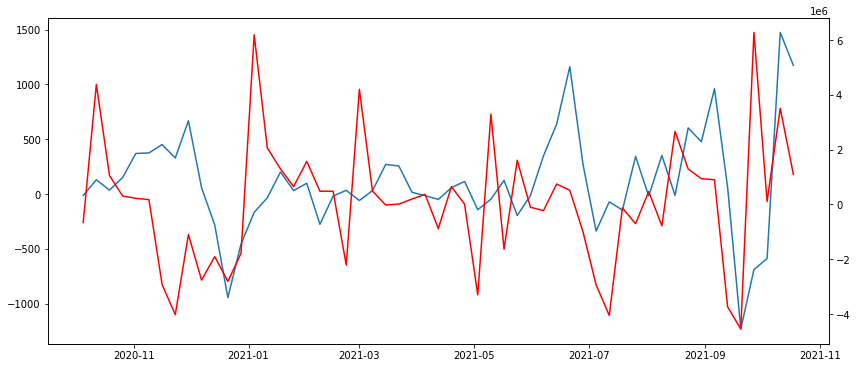

In [ ]:
fig = plt.figure(figsize=(14, 6))
ax = plt.subplot(1,1,1)

ax.plot(day_before_14['기준일_x'], day_before_14['신규확진자'])

ax2 = ax.twinx()
ax2.plot(day_before_14['기준일_x'], day_before_14['일별이용자수'], color='r')

plt.show()

In [ ]:
day_before_14

,기준일_x,일별이용자수,신규확진자
0,2020-10-05,-659446.0,-13.0
1,2020-10-12,4380030.0,130.0
2,2020-10-19,1054800.0,36.0
3,2020-10-26,305483.0,151.0
4,2020-11-02,220499.0,370.0
5,2020-11-09,174280.0,375.0
6,2020-11-16,-2926167.0,451.0
7,2020-11-23,-4021835.0,329.0
8,2020-11-30,-1098827.0,668.0
9,2020-12-07,-2761299.0,58.0


In [ ]:
day_before_14 = day_before_14.drop(day_before_14.index[[55]])

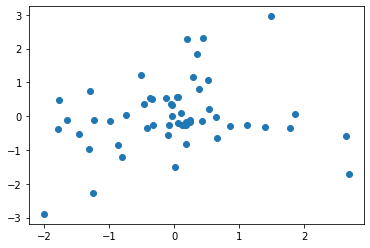

In [ ]:
x = day_before_14[['일별이용자수']]
y = day_before_14[['신규확진자']]

scaler.fit(x)
x = scaler.transform(x)

scaler.fit(y)
y = scaler.transform(y)

plt.scatter(x, y)
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

line_fitter = LinearRegression()
line_fitter.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(line_fitter.coef_, line_fitter.intercept_)

[[0.27811388]] [-0.03767837]


In [ ]:
line_fitter.score(x_train, y_train)

0.06842629273374767

In [ ]:
line_fitter.score(x_test, y_test)

-0.15077100639635055

In [ ]:
train_poly = np.column_stack((x_train ** 2, x_train))
test_poly = np.column_stack((x_test ** 2, x_test))

In [ ]:
lr = LinearRegression()
lr.fit(train_poly, y_train)

LinearRegression()

In [ ]:
lr.score(train_poly, y_train)

0.23578132342829594

In [ ]:
lr.score(test_poly, y_test)

-0.07487801809068384

<h3> 1.확진일 - 지하철이용일 = 0

In [ ]:
metro_data_0_ago = metro_data[metro_data['기준일']>'2020-01-19'].reset_index(drop=True)

In [ ]:
day_before_0 = pd.merge(metro_data_0_ago, confirmed_data, left_index=True, right_index=True, how='left')

In [ ]:
day_before_0["기준일_x"] = pd.to_datetime(day_before_0["기준일_x"])

In [ ]:
day_before_0

,기준일_x,일별이용자수,기준일_y,신규확진자
0,2020-01-20,8023369,2020-01-20,0
1,2020-01-21,8063435,2020-01-21,0
2,2020-01-22,8058478,2020-01-22,0
3,2020-01-23,7641489,2020-01-23,0
4,2020-01-24,3266041,2020-01-24,0
...,...,...,...,...
646,2021-10-27,6788314,2021-10-27,729
647,2021-10-28,6763319,2021-10-28,788
648,2021-10-29,6975784,2021-10-29,770
649,2021-10-30,5076792,2021-10-30,706


In [ ]:
day_before_0 = day_before_0.drop(columns='기준일_y')

In [ ]:
day_before_0 = day_before_0.resample('W-Mon', on='기준일_x').sum().reset_index()
day_before_0["기준일_x"] = day_before_0['기준일_x'] - timedelta(days=7)
day_before_0

,기준일_x,일별이용자수,신규확진자
0,2020-01-13,8023369,0
1,2020-01-20,37274813,1
2,2020-01-27,45239198,7
3,2020-02-03,43106598,4
4,2020-02-10,45354541,2
...,...,...,...
89,2021-09-27,36905927,5860
90,2021-10-04,37010638,4630
91,2021-10-11,40517060,3941
92,2021-10-18,41611630,3353


In [ ]:
day_before_0.loc[day_before_0["기준일_x"]=="2020-01-20", ["일별이용자수"]] = 48502959
day_before_0.loc[day_before_0["기준일_x"]=="2020-09-28", ["일별이용자수"]] = 37663267
day_before_0.loc[day_before_0["기준일_x"]=="2021-02-08", ["일별이용자수"]] = 38074803

In [ ]:
# 변화량을 확인하기 위해 컬럼 추출
metro_user = day_before_0['일별이용자수']
confirmed = day_before_0['신규확진자']

In [ ]:
metro_user = metro_user.drop(metro_user.index[[93]])
confirmed = confirmed.drop(confirmed.index[[93]])

In [ ]:
day_before_0['일별이용자수'] = day_before_0['일별이용자수'] - metro_user
day_before_0['신규확진자'] = day_before_0['신규확진자'] - confirmed

In [ ]:
day_before_0 = day_before_0[day_before_0['기준일_x']>'2020-10-01'].reset_index(drop=True)

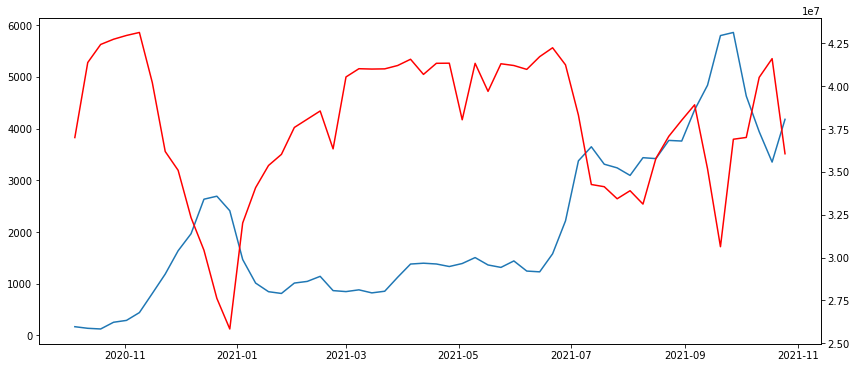

In [ ]:
fig = plt.figure(figsize=(14, 6))
ax = plt.subplot(1,1,1)

ax.plot(day_before_0['기준일_x'], day_before_0['신규확진자'])

ax2 = ax.twinx()
ax2.plot(day_before_0['기준일_x'], day_before_0['일별이용자수'], color='r')

plt.show()

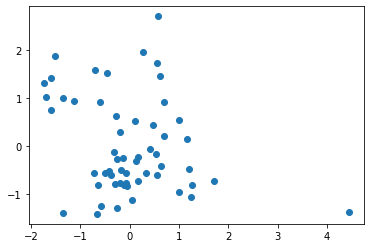

In [ ]:
x = day_before_0[['일별이용자수']]
y = day_before_0[['신규확진자']]

scaler.fit(x)
x = scaler.transform(x)

scaler.fit(y)
y = scaler.transform(y)

plt.scatter(x, y)
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

line_fitter = LinearRegression()
line_fitter.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(line_fitter.coef_, line_fitter.intercept_)

[[-0.27140706]] [-0.00176805]


In [ ]:
line_fitter.score(x_train, y_train)

0.04752605826217393

In [ ]:
line_fitter.score(x_test, y_test)

0.1627620833793122

In [ ]:
train_poly = np.column_stack((x_train ** 2, x_train))
test_poly = np.column_stack((x_test ** 2, x_test))

In [ ]:
lr = LinearRegression()
lr.fit(train_poly, y_train)

LinearRegression()

In [ ]:
lr.score(train_poly, y_train)

0.09014675452785137

In [ ]:
lr.score(test_poly, y_test)

-2.0122086949257314

<h4>우리의 가정은 현재의 지하철 이용자수가 미래의 코로나 확진자수에 영향을 준다는것이였다.<br>
그러나 (코로나 확진일 - 지하철 이용일)이 14일 때, 7일 때, 0일 때를 비교했을 때 0일 때가 가장 점수가 높았다.<br>
이유를 유추해 보니 코로나 신규 확진자 수는 자기상관관계에 있기 때문인것 같았다.<br>
즉 어제의 신규확진자가 많다면, 그만큼 오늘의 신규확진자도 많을것으로 기대되기때문에 예측의 성능이 나빠지는 것이다.<br>
(is the 전염)

In [ ]:
# 확진자수의 자기상관을 알아보기위한 셀 그 0
# 작업 이전의 day_before_0를 불러와줌
day_before_0

,기준일_x,일별이용자수,신규확진자
0,2020-10-05,37003821,169
1,2020-10-12,41383851,138
2,2020-10-19,42438651,125
3,2020-10-26,42744134,255
4,2020-11-02,42964633,291
5,2020-11-09,43138913,442
6,2020-11-16,40212746,812
7,2020-11-23,36190911,1187
8,2020-11-30,35092084,1638
9,2020-12-07,32330785,1967


In [ ]:
# 확진자수의 자기상관을 알아보기위한 셀 그 1
# 확진자수 데이터를 일주일 차이를 내서 그 경향을 분석함
day_before_0 = day_before_0.drop(0).reset_index(drop=True)
day_before_0 = pd.merge(day_before_0, confirmed, left_index=True, right_index=True, how='left')
day_before_0

,기준일_x,일별이용자수,신규확진자_x,신규확진자_y
0,2020-01-20,48502959,1,0
1,2020-01-27,45239198,7,1
2,2020-02-03,43106598,4,7
3,2020-02-10,45354541,2,4
4,2020-02-17,41549862,17,2
...,...,...,...,...
88,2021-09-27,36905927,5860,5800
89,2021-10-04,37010638,4630,5860
90,2021-10-11,40517060,3941,4630
91,2021-10-18,41611630,3353,3941


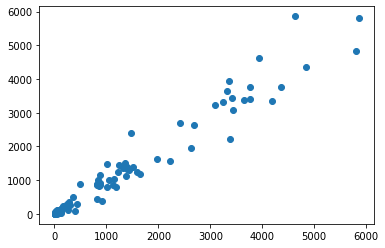

In [ ]:
# 확진자수의 자기상관을 알아보기위한 셀 그 2

x = day_before_0[['신규확진자_x']]
y = day_before_0[['신규확진자_y']]

plt.scatter(x, y)
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=28)

line_fitter = LinearRegression()
line_fitter.fit(train_poly, y_train)

LinearRegression()

In [ ]:
train_poly = np.column_stack((x_train ** 2, x_train))
test_poly = np.column_stack((x_test ** 2, x_test))

In [ ]:
line_fitter.score(train_poly, y_train)

0.948227342661433

In [ ]:
line_fitter.score(test_poly, y_test)

0.9679157293589337

In [ ]:
print(line_fitter.coef_, line_fitter.intercept_)

[[-6.70052933e-06  9.88727260e-01]] [-0.36041055]


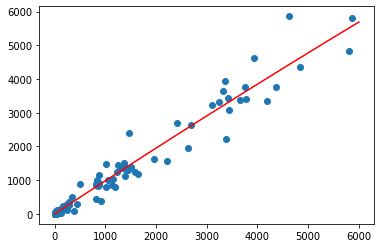

In [ ]:
# 추세선 그려보기

x = day_before_0[['신규확진자_x']]
y = day_before_0[['신규확진자_y']]


point = np.arange(0, 6000)

plt.plot(point, -0.00000670052933*point**2 + 0.988727260*point + -0.36041055, color='red')

plt.scatter(x, y)
plt.show()

시험삼아 일주일정도 시간을 비틀었더니 나쁘지 않은 상관관계가 나타났다.

In [ ]:
# 단순 수치를 이용한 회귀

user_and_confirm = day_before_0[['일별이용자수', '신규확진자_y']]

In [ ]:
independent = user_and_confirm.to_numpy()

In [ ]:
dependent = day_before_0[['신규확진자_x']].to_numpy()

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(independent, dependent, random_state=28)

In [ ]:
# 특성생성
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(69, 5)


In [ ]:
test_poly = poly.transform(test_input)

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(train_poly, train_target)
print(linear_regression.score(train_poly, train_target))

0.9576709961807365


In [ ]:
print(linear_regression.score(test_poly, test_target))

0.9370108600427001


In [ ]:
# 계수와 상수항 확인
print(linear_regression.coef_, linear_regression.intercept_)

[[ 4.01079625e-04  1.99805286e+00 -5.03308506e-12 -2.25351105e-08
  -4.00544139e-05]] [-7916.72241074]


In [ ]:
# 생성된 특성 정보 확인(x0 = 지하철 이용자수 | x1 = 신규확진자수)
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

계수를 확인한 결과 지하철 이용자수와 관련된 계수가 너무 낮게 나왔다.<br>
이는 지하철 이용자수의 스케일이 신규확진자수의 스케일보다 월등히 크기 떄문이다.<br>
표준화를 이용해 스케일링을 해주자.

In [ ]:
# 범위 학습
scaler.fit(train_input)

# 훈련 세트 변환
trans_train_input = scaler.transform(train_input)

# 검증 세트 변환
trans_test_input = scaler.transform(test_input)

In [ ]:
# 특성생성
poly = PolynomialFeatures(include_bias=False)
poly.fit(trans_train_input)
train_poly = poly.transform(trans_train_input)
print(train_poly.shape)

(69, 5)


In [ ]:
test_poly = poly.transform(trans_test_input)

In [ ]:
# 계수와 상수항 확인
print(linear_regression.coef_, linear_regression.intercept_)

[[ -32.21017943 1616.68355236  -89.62652576 -147.59608519  -96.48139094]] [1577.85204012]


In [ ]:
# 생성된 특성 정보 확인(x0 = 지하철 이용자수 | x1 = 신규확진자수)
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

생각보다 괜찮게 나왔는데 생각해보니 독립변수의 신규확진자는 일주일 전의 데이터를 넣었는데, 지하철 이용자수는 같은 주의 데이터를 비교하였다.

In [ ]:
metro_data_7_ago = metro_data[metro_data['기준일']>'2020-01-12'].reset_index(drop=True)

In [ ]:
day_before_7 = pd.merge(metro_data_7_ago, confirmed_data, left_index=True, right_index=True, how='left')

In [ ]:
day_before_7["기준일_x"] = pd.to_datetime(day_before_7["기준일_x"])

In [ ]:
day_before_7 = day_before_7.drop(columns='기준일_y')

In [ ]:
day_before_7 = day_before_7.resample('W-Mon', on='기준일_x').sum().reset_index()
day_before_7["기준일_x"] = day_before_7['기준일_x'] - timedelta(days=7)
day_before_7

,기준일_x,일별이용자수,신규확진자
0,2020-01-06,7931538,0
1,2020-01-13,51766720,1
2,2020-01-20,37274813,7
3,2020-01-27,45239198,4
4,2020-02-03,43106598,2
...,...,...,...
90,2021-09-27,36905927,4630
91,2021-10-04,37010638,3941
92,2021-10-11,40517060,3353
93,2021-10-18,41611630,4826


In [ ]:
day_before_7.loc[day_before_7["기준일_x"]=="2020-01-20", ["일별이용자수"]] = 48502959
day_before_7.loc[day_before_7["기준일_x"]=="2020-09-28", ["일별이용자수"]] = 37663267
day_before_7.loc[day_before_7["기준일_x"]=="2021-02-08", ["일별이용자수"]] = 38074803

In [ ]:
day_before_7

,기준일_x,일별이용자수,신규확진자
0,2020-01-06,7931538,0
1,2020-01-13,51766720,1
2,2020-01-20,48502959,7
3,2020-01-27,45239198,4
4,2020-02-03,43106598,2
...,...,...,...
90,2021-09-27,36905927,4630
91,2021-10-04,37010638,3941
92,2021-10-11,40517060,3353
93,2021-10-18,41611630,4826


In [ ]:
confirmed = day_before_7['신규확진자']

In [ ]:
day_before_7 = day_before_7.drop(0).reset_index(drop=True)

In [ ]:
day_before_7 = pd.merge(day_before_7, confirmed, left_index=True, right_index=True, how='left')

In [ ]:
day_before_7

,기준일_x,일별이용자수,신규확진자_x,신규확진자_y
0,2020-01-13,51766720,1,0
1,2020-01-20,48502959,7,1
2,2020-01-27,45239198,4,7
3,2020-02-03,43106598,2,4
4,2020-02-10,45354541,17,2
...,...,...,...,...
89,2021-09-27,36905927,4630,5860
90,2021-10-04,37010638,3941,4630
91,2021-10-11,40517060,3353,3941
92,2021-10-18,41611630,4826,3353


In [ ]:
# 단순 수치를 이용한 회귀
user_and_confirm = day_before_7[['일별이용자수', '신규확진자_y']]

In [ ]:
independent = user_and_confirm.to_numpy()

In [ ]:
dependent = day_before_7[['신규확진자_x']].to_numpy()

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(independent, dependent, random_state=28)

In [ ]:
# 범위 학습
scaler.fit(train_input)

# 훈련 세트 변환
trans_train_input = scaler.transform(train_input)

# 검증 세트 변환
trans_test_input = scaler.transform(test_input)

In [ ]:
# 특성생성
poly = PolynomialFeatures(include_bias=False)
poly.fit(trans_train_input)
train_poly = poly.transform(trans_train_input)
print(train_poly.shape)

(70, 5)


In [ ]:
test_poly = poly.transform(trans_test_input)

In [ ]:
# fit_intercept : 상수항 존재 유무
linear_regression = LinearRegression(fit_intercept=True)
linear_regression.fit(train_poly, train_target)
print(linear_regression.score(train_poly, train_target))

0.9505300933118842


In [ ]:
print(linear_regression.score(test_poly, test_target))

0.9726265196063248


In [ ]:
# 계수와 상수항 확인
print(linear_regression.coef_, linear_regression.intercept_)

[[ 9.51390737e+01  1.72920470e+03 -5.78793858e+01 -6.43294019e-01
  -1.04539214e+02]] [1609.75484575]


In [ ]:
# 생성된 특성 정보 확인(x0 = 지하철 이용자수 | x1 = 신규확진자수)
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

지하철이용자도 지하철이용자 변화량을 이용하도록 하겠다.

In [ ]:
metro_data_7_ago = metro_data[metro_data['기준일']>'2020-01-12'].reset_index(drop=True)

In [ ]:
day_before_7 = pd.merge(metro_data_7_ago, confirmed_data, left_index=True, right_index=True, how='left')

In [ ]:
day_before_7["기준일_x"] = pd.to_datetime(day_before_7["기준일_x"])

In [ ]:
day_before_7 = day_before_7.resample('W-Mon', on='기준일_x').sum().reset_index()
day_before_7["기준일_x"] = day_before_7['기준일_x'] - timedelta(days=7)
day_before_7

,기준일_x,일별이용자수,신규확진자
0,2020-01-06,7931538,0
1,2020-01-13,51766720,1
2,2020-01-20,37274813,7
3,2020-01-27,45239198,4
4,2020-02-03,43106598,2
...,...,...,...
90,2021-09-27,36905927,4630
91,2021-10-04,37010638,3941
92,2021-10-11,40517060,3353
93,2021-10-18,41611630,4826


In [ ]:
day_before_7.loc[day_before_7["기준일_x"]=="2020-01-20", ["일별이용자수"]] = 48502959
day_before_7.loc[day_before_7["기준일_x"]=="2020-09-28", ["일별이용자수"]] = 37663267
day_before_7.loc[day_before_7["기준일_x"]=="2021-02-08", ["일별이용자수"]] = 38074803

In [ ]:
# 변화량을 확인하기 위한 컬럼 추출
metro_user = day_before_7['일별이용자수']
confirmed = day_before_7['신규확진자']

In [ ]:
day_before_7 = day_before_7.drop(0).reset_index(drop=True)

In [ ]:
day_before_7 = pd.merge(day_before_7, confirmed, left_index=True, right_index=True, how='left')

In [ ]:
day_before_7

,기준일_x,일별이용자수,신규확진자_x,신규확진자_y
0,2020-01-13,51766720,1,0
1,2020-01-20,48502959,7,1
2,2020-01-27,45239198,4,7
3,2020-02-03,43106598,2,4
4,2020-02-10,45354541,17,2
...,...,...,...,...
89,2021-09-27,36905927,4630,5860
90,2021-10-04,37010638,3941,4630
91,2021-10-11,40517060,3353,3941
92,2021-10-18,41611630,4826,3353


In [ ]:
metro_user = metro_user.drop(94)

In [ ]:
day_before_7['일별이용자수'] = day_before_7['일별이용자수'] - metro_user

In [ ]:
day_before_7

,기준일_x,일별이용자수,신규확진자_x,신규확진자_y
0,2020-01-13,43835182,1,0
1,2020-01-20,-3263761,7,1
2,2020-01-27,-3263761,4,7
3,2020-02-03,-2132600,2,4
4,2020-02-10,2247943,17,2
...,...,...,...,...
89,2021-09-27,6273033,4630,5860
90,2021-10-04,104711,3941,4630
91,2021-10-11,3506422,3353,3941
92,2021-10-18,1094570,4826,3353


In [ ]:
day_before_7 = day_before_7.drop([0, 93]).reset_index(drop=True)

In [ ]:
day_before_7

,기준일_x,일별이용자수,신규확진자_x,신규확진자_y
0,2020-01-20,-3263761,7,1
1,2020-01-27,-3263761,4,7
2,2020-02-03,-2132600,2,4
3,2020-02-10,2247943,17,2
4,2020-02-17,-3804679,61,17
...,...,...,...,...
87,2021-09-20,-4545375,5860,5800
88,2021-09-27,6273033,4630,5860
89,2021-10-04,104711,3941,4630
90,2021-10-11,3506422,3353,3941


In [ ]:
user_and_confirm = day_before_7[['일별이용자수', '신규확진자_y']]

In [ ]:
user_and_confirm

,일별이용자수,신규확진자_y
0,-3263761,1
1,-3263761,7
2,-2132600,4
3,2247943,2
4,-3804679,17
...,...,...
87,-4545375,5800
88,6273033,5860
89,104711,4630
90,3506422,3941


In [ ]:
independent = user_and_confirm.to_numpy()

In [ ]:
dependent = day_before_7[['신규확진자_x']].to_numpy()

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(independent, dependent, random_state=28)

In [ ]:
# 범위 학습
scaler.fit(train_input)

# 훈련 세트 변환
trans_train_input = scaler.transform(train_input)

# 검증 세트 변환
trans_test_input = scaler.transform(test_input)

In [ ]:
# 특성생성
poly = PolynomialFeatures(include_bias=False)
poly.fit(trans_train_input)
train_poly = poly.transform(trans_train_input)
print(train_poly.shape)

(69, 5)


In [ ]:
test_poly = poly.transform(trans_test_input)

In [ ]:
# fit_intercept : 상수항 존재 유무
linear_regression = LinearRegression()
linear_regression.fit(train_poly, train_target)
print(linear_regression.score(train_poly, train_target))

0.9507127351534308


In [ ]:
print(linear_regression.score(test_poly, test_target))

0.9613511561655287


In [ ]:
# 계수와 상수항 확인
print(linear_regression.coef_, linear_regression.intercept_)

[[ -85.85573679 1627.20190936  -25.20239418  -57.41641829  -62.84062882]] [1535.99134374]


In [ ]:
# 생성된 특성 정보 확인(x0 = 지하철 이용자수 | x1 = 신규확진자수)
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

비교적 최근의 샘플로 시도해봄

In [ ]:
day_before_7_2021 = day_before_7[day_before_7['기준일_x']>'2020-12-31']

In [ ]:
user_and_confirm = day_before_7_2021[['일별이용자수', '신규확진자_y']]

In [ ]:
independent = user_and_confirm.to_numpy()

In [ ]:
dependent = day_before_7_2021[['신규확진자_x']].to_numpy()

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(independent, dependent, random_state=28)

In [ ]:
# 범위 학습
scaler.fit(train_input)

# 훈련 세트 변환
trans_train_input = scaler.transform(train_input)

# 검증 세트 변환
trans_test_input = scaler.transform(test_input)

In [ ]:
# 특성생성
poly = PolynomialFeatures(include_bias=False)
poly.fit(trans_train_input)
train_poly = poly.transform(trans_train_input)
print(train_poly.shape)

(31, 5)


In [ ]:
test_poly = poly.transform(trans_test_input)

In [ ]:
# fit_intercept : 상수항 존재 유무
linear_regression = LinearRegression()
linear_regression.fit(train_poly, train_target)
print(linear_regression.score(train_poly, train_target))

0.9376539988413919


In [ ]:
print(linear_regression.score(test_poly, test_target))

0.9200495767977489


In [ ]:
# 계수와 상수항 확인
print(linear_regression.coef_, linear_regression.intercept_)

[[-107.54786865 1568.30831884  -47.30795681 -107.06016524  -83.3643827 ]] [2431.62916249]


In [ ]:
# 생성된 특성 정보 확인(x0 = 지하철 이용자수 | x1 = 신규확진자수)
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [ ]:
sample = [[1094570,4826]]
scaled_sample = scaler.transform(sample)
scaled_sample_poly = poly.transform(scaled_sample)
linear_regression.predict(scaled_sample_poly)

array([[4927.06962742]])